In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
 
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
 
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.4,
                                   zoom_range=0.1,
                                   validation_split=0.4,
                                   horizontal_flip=True,)

In [ ]:
train_gernator = train_datagen.flow_from_directory("/content/drive/MyDrive/flowers",
                                                   target_size=(180,180),
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   subset='training',
                                                   shuffle=True)

Found 2599 images belonging to 5 classes.


In [ ]:
validation_gernator = train_datagen.flow_from_directory("/content/drive/MyDrive/flowers",
                                                   target_size=(180,180),
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   subset='validation',
                                                   shuffle=True)

Found 1728 images belonging to 5 classes.


In [ ]:
validation_gernator[2][1]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
validation_gernator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
train_gernator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(180,180,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(5,activation='softmax')


])


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
result = model.fit(train_gernator,steps_per_epoch=30,epochs=10,
                   validation_data=validation_gernator,
                   validation_steps=30)

Epoch 1/10
30/30 [==============================] - 450s 15s/step - loss: 2.6572 - accuracy: 0.2487 - val_loss: 2.2557 - val_accuracy: 0.2383
Epoch 2/10
30/30 [==============================] - 425s 14s/step - loss: 1.6329 - accuracy: 0.2293 - val_loss: 1.4103 - val_accuracy: 0.3183
Epoch 3/10
30/30 [==============================] - 354s 12s/step - loss: 1.4503 - accuracy: 0.3904 - val_loss: 1.2516 - val_accuracy: 0.4650
Epoch 4/10
30/30 [==============================] - 330s 11s/step - loss: 1.3253 - accuracy: 0.4347 - val_loss: 1.1683 - val_accuracy: 0.5400
Epoch 5/10
30/30 [==============================] - 312s 10s/step - loss: 1.2856 - accuracy: 0.5084 - val_loss: 1.1892 - val_accuracy: 0.4850
Epoch 6/10
30/30 [==============================] - 310s 10s/step - loss: 1.2099 - accuracy: 0.5342 - val_loss: 1.0504 - val_accuracy: 0.5700
Epoch 7/10
30/30 [==============================] - 311s 10s/step - loss: 1.2539 - accuracy: 0.5246 - val_loss: 1.0664 - val_accuracy: 0.6067
Epoch 

In [ ]:
model.evaluate(validation_gernator)

87/87 [==============================] - 193s 2s/step - loss: 1.0231 - accuracy: 0.5700


[1.0230780839920044, 0.5700231194496155]

In [ ]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

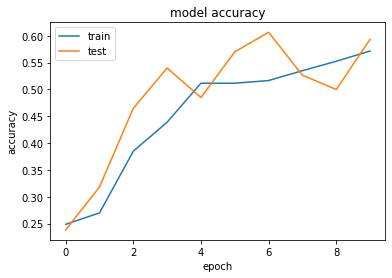

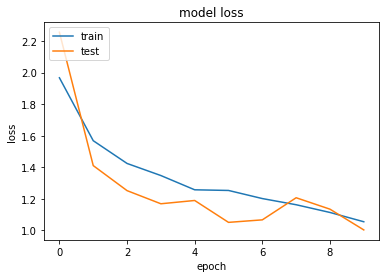

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy 
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()



In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(validation_gernator),axis=1)

In [ ]:
y_pred.shape

(1728,)

In [ ]:
validation_gernator[0]

(array([[[[9.49019670e-01, 8.62745166e-01, 6.66666687e-01],
          [9.49019670e-01, 8.62745166e-01, 6.66666687e-01],
          [9.49019670e-01, 8.62745166e-01, 6.66666687e-01],
          ...,
          [8.45703542e-01, 7.43742764e-01, 5.20213306e-01],
          [8.45701277e-01, 7.43740499e-01, 5.20211041e-01],
          [8.45698953e-01, 7.43738115e-01, 5.20208716e-01]],
 
         [[9.48433518e-01, 8.62159014e-01, 6.66080594e-01],
          [9.48431194e-01, 8.62156689e-01, 6.66078269e-01],
          [9.48428929e-01, 8.62154424e-01, 6.66076005e-01],
          ...,
          [8.41145396e-01, 7.40180552e-01, 5.17647088e-01],
          [8.41140747e-01, 7.40178227e-01, 5.17647088e-01],
          [8.41136158e-01, 7.40175962e-01, 5.17647088e-01]],
 
         [[9.45098102e-01, 8.58823597e-01, 6.62745118e-01],
          [9.45098102e-01, 8.58823597e-01, 6.62745118e-01],
          [9.45098102e-01, 8.58823597e-01, 6.62745118e-01],
          ...,
          [8.35294187e-01, 7.37254918e-01, 5.1764